# In-Class - Session 4

#### 1. Load the image statue.jpg and print its shape and comemnt about its spatial and graylevel resolution


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

img=cv2.imread('statue.png',0)
print(img.shape)
print(img.max())

# Spatial resolution is 288 x 384 
# graylevel resolution is 8 bit, because to represent 252 levels 8 bit is required (2^8 = 256)

(288, 384)
252


#### 2. Darken the Image loaded in the first step  

In [ ]:
img1=img-50
img1[img1<0]=0
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.imshow('img1',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 3. Apply exponential and log transform on the image with differnt constants

In [ ]:
imgg=img/255.
c=-1.2
img2=np.exp(c*imgg)
img3=np.log(1+imgg)
cv2.imshow('img',img2)
cv2.waitKey(0)
cv2.imshow('img1',img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 4. Plot the histogram of the statue image and comment about the contrast nature of the image

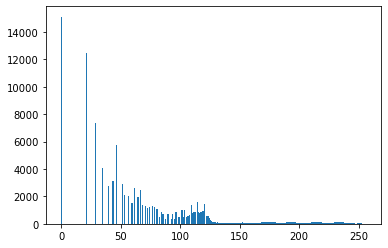

In [ ]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

#### #### 5. Apply Histogram equlization and adaptive histogram eqilization to imporve the contrast of the image

In [ ]:
equ=cv2.equalizeHist(img)

clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(4,4))
cl1 = clahe.apply(img)

res = np.hstack((img,equ,cl1)) 
cv2.imshow("adaptive histogram",res)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 6. Load your passport image and visualize each color plane along with its histogram

In [ ]:
img=cv2.imread('ballons.bmp')
imgb=img[:,:,0]
imgg=img[:,:,1]
imgr=img[:,:,2]

img1=img.copy()
img1[:,:,0]=imgb
img1[:,:,1]=0
img1[:,:,2]=0
cv2.imshow('blue_plane',img1)
cv2.waitKey(0)

img2=img.copy()
img2[:,:,0]=0
img2[:,:,1]=imgg
img2[:,:,2]=0
cv2.imshow('green_plane',img2)
cv2.waitKey(0)

img3=img.copy()
img3[:,:,0]=0
img3[:,:,1]=0
img3[:,:,2]=imgr
cv2.imshow('red_plane',img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 7. Load the image 'leena.png'. Reduce the noise present in the image.

(<AxesSubplot:title={'center':'Averaging'}>,
 Text(0.5, 1.0, 'Averaging'))

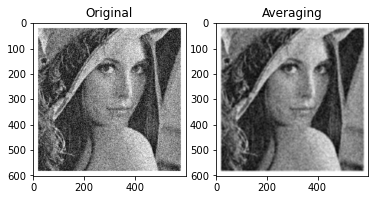

In [ ]:
img=cv2.imread('leena.png',0)
kernel=np.ones((7,7),dtype="float")/49
filt = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img,'gray'),plt.title('Original')

plt.subplot(122),plt.imshow(filt,'gray'),plt.title('Averaging')

#### 8. Load the image 'opencv.png' and extract only the edges from the images.

In [ ]:
img=cv2.imread('opencv.png')
img=cv2.resize(img,(200,200))
grayim = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel=np.matrix('-1 -1 -1; -1 8 -1; -1 -1 -1')
dst = cv2.filter2D(grayim,-1,kernel)
dst1=25*dst
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.imshow('edges',dst1)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 9. Segment only the elephant from the elephant.jpg image

In [ ]:
a=cv2.imread('cheetha.jpg',0)
b = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
b=cv2.resize(a,(400,400))
c=b.copy()
c[(b>130)]=0
c[(b<=130)]=255
cv2.imshow('img',c)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 10. Apply required morphological processing to clean the segmented image

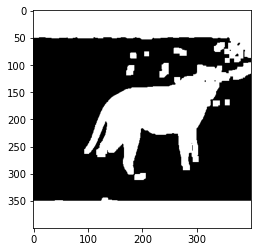

In [ ]:
se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
mask = cv2.morphologyEx(c, cv2.MORPH_OPEN, se1)
plt.imshow(mask,'gray')

#### 11. Compute the area of the segmented Cheetha image. (If required crop the unwanted part)


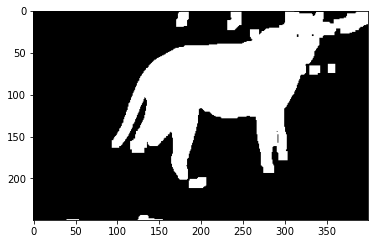

In [ ]:
mask1=mask[100:350,:] # to remove non cheeta part
plt.imshow(mask1,cmap='gray')

In [ ]:
# area of the cheetha mask
ar=(mask1!=0).sum()
ar

25941

#### 12. Compute the height and width of the Cheetha


In [ ]:
max_h=(mask1!=0).sum(axis=0).max()
print('Height',max_h)

max_w=(mask1!=0).sum(axis=1).max()
print('Width',max_w)

#### 13 Compute the eccencity ratio of the cheetha


In [ ]:
ecc=max_h/max_w
ecc

0.8240740740740741

#### 14 Compute the average diameter of the cheetha image (average of number of pixels in each row)

In [ ]:
avg_dia=(mask1!=0).sum(axis=1).mean()
print('Average_dia',avg_dia)

Average_dia 103.764


#### 15 Compute the Position of Cheetha in the image

In [ ]:
m = cv2.moments(mask1)
 
x = np.round(m['m10']/m['m00'])
y = np.round(m['m01']/m['m00'])
print(x,y)


233.0 90.0


#### 16 Frame the feature vector for Cheeta

In [ ]:
cheetha1 = np.array([ar,max_h,max_w,ecc,avg_dia,x,y])

In [ ]:
cheetha1

array([2.59410000e+04, 1.78000000e+02, 2.16000000e+02, 8.24074074e-01,
       1.03764000e+02, 2.33000000e+02, 9.00000000e+01])